## Теория статистических решений. 
Работу выполнил Ковалев Александр Витальевич, студент 435 группы Физического факультета МГУ

### Задача 1
### Постановка задачи:
#### Контекст.
ПОстараемся моделировать работу нейро-компьютерных интерфейсов(НКИ). Это устройства, позволяющие людям с ограниченными возможностями взаимодействовать с внешним миров с помощью "силы мысли"(мозговой активости).
У нас есть пациент, которому вживили электроды в головной мозг. Допустим пациент может находится в двух состояниях, которое мы можемм зарегистрировать с помощью электродов( не будем вдаваться в подробности этого). 
Человек думает о движении, человек не думает об этом(витает в облаках).

7 сценариев действия. Это работа нашего устройства(например смещение курсора мыши ). На сколько мы смещаем.
Работаем в одномерном пространстве( влево сместить либо в право сместить )

$$D = \{ d_1 (y = -0.9), d_2 (y = -0.5), d_3 (y = -0.1), d_4 (y = 0), d_5 (y = 0.1), d_6 (y = 0.5), d_7 (y = 0.9) \} $$
   
Задана матрица потерь $l(\theta_i, d_j)$:

|$\theta_i / d_j$|$d_1$ |$d_2$ |$d_3$ |$d_4$ |$d_5$ |$d_6$ |$d_7$ |
|----------------|------|------|------|------|------|------|------|
|$\theta_1$      |  9   |  7   |  5   |  3   |  5   |  7   |  9   |
|$\theta_2$      |  3   |  5   |  7   |  9   |  7   |  5   |  3   |

**Минимаксное и рандомизированное минимаксное правила принятия решений**

* Независимо от наступившего состояния природы в момент принятия решения по уже известному множеству $\Theta$ возможных состояний природы определим правило принятия решения как:<br>
$$ c^* = \min_{d \in D} \max_{\theta \in \Theta} l(\theta, d) $$ , в случае минимумов в нескольких $d_i$, можем взять любое из них.

* Возможно использование эксперимента с $m$ случайными исходами $ \alpha_1, ... , \alpha_m, \sum_{i=1}^m {p(\alpha_i = 1)} $. Разыграв случайный эксперимент, примем решение о действии $d_{i_j}$, если исходом окажется $\alpha_j$:<br>
$$ c^*_r = \min \max ( l_1(p), ... , l_k(p) ) | p \in \mathcal{P} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
l_1 = [8, 5, 3, 2, 1, 3, 6, 9];
l_2 = [1, 3, 4, 9, 9, 5, 2, 1];
# l_1_border = [3, 4, 6, 8, 7, 3];
# l_2_border = [5, 8, 7, 4, 3, 5];
x = np.linspace(0, 10, 11);

In [3]:
A = []
for i in range(len(l_1)):
    A.append([l_1[i], l_2[i]])
print(A)
from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = np.array(A)
hull = ConvexHull(points)

l_1_border = hull.points[:, 0]
l_2_border = hull.points[:, 1]

[[8, 1], [5, 3], [3, 4], [2, 9], [1, 9], [3, 5], [6, 2], [9, 1]]


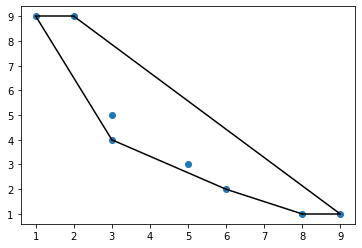

In [4]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices[:]:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

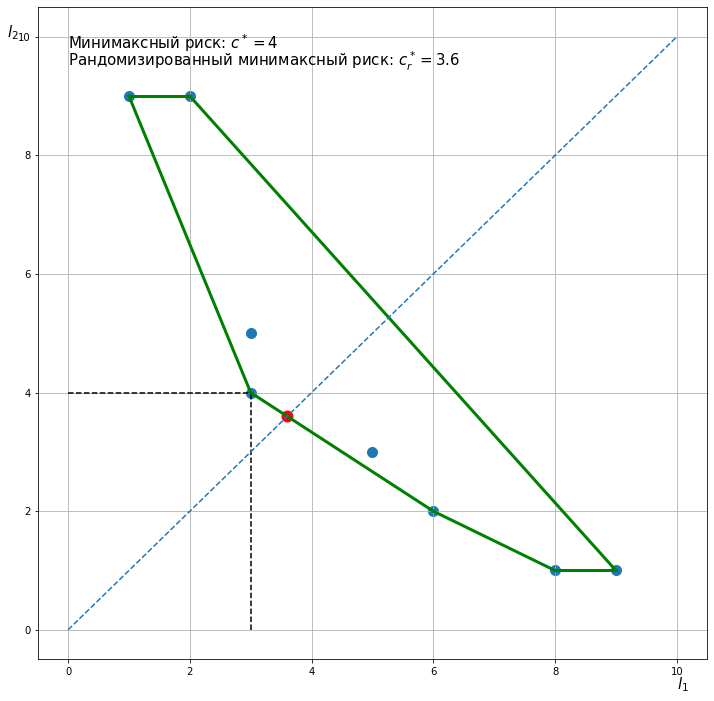

In [20]:
plt.figure(figsize = (12, 12))
plt.scatter(l_1, l_2, s =100)
for simplex in hull.simplices[:]:
    plt.plot(points[simplex, 0], points[simplex, 1], 'green', lw = 3)
plt.text(10, -1, '$l_1$', fontsize=15)
plt.text(-1, 10, '$l_2$', fontsize=15)

plt.vlines(l_1[2], 0, l_2[2], linestyles='dashed')
plt.hlines(l_2[2], 0, l_1[2], linestyles='dashed')
# plt.text(3.2, 0, s = r'$l(\theta_2, d_1)$', fontsize=15)
# plt.text(0, 5.3, s = r'$l(\theta_1, d_1)$', fontsize=15)

# plt.vlines(l_1[5], 0, l_2[5], linestyles='dashed')
# plt.hlines(l_2[5], 0, l_1[5], linestyles='dashed')
# plt.text(7.2, 0, s = r'$l(\theta_2, d_6)$', fontsize=15)
# plt.text(0, 3.3, s = r'$l(\theta_1, d_6)$', fontsize=15)

plt.scatter(3.6, 3.6, color='red', s  = 120)

plt.text(0, 9.8, s = r'Минимаксный риск: $c^* = 4$', fontsize=15)
plt.text(0, 9.5, s = r'Рандомизированный минимаксный риск: $c_r^* = 3.6$', fontsize=15)

plt.grid()
plt.plot(x, x, '--')
plt.show()

#### Теория статистических решений. Задача 2

Продолжим реализовывать НКИ, однако теперь у нас есть сторонние наблюдения за состоянием человека  $X$ = {$x_1, ... , x_q$}.<br> Пусть это будет внешнее устройство(запись с электродов), внешний наблюдатель, который по психологическим моментам может понять состояние человек, также мы попросили человека постоянно говорить о своих состояниях. Большей вероятностью будут обладать его собственнные записи, всё остальное чуть меньше.
* $X$ = { $x_1, x_2, x_3$ }.


* $\Theta$ = { $\theta_1$('Cвободное '), $\theta_2$('Представление движения') }.
    * $$\theta_1 : {P(\xi=x_1) = \frac{2}{3}, P(\xi=x_2) = \frac{1}{6}, P(\xi=x_3) = \frac{1}{6}}$$
    * $$\theta_2 : {P(\xi=x_1) = \frac{1}{2}, P(\xi=x_2) = \frac{1}{8}, P(\xi=x_3) = \frac{3}{8}}$$

**Стратегия принятия решений**

Необходимо найти стратегию $s(\cdot): X \to D$. Каждому правилу $s$ ставим в соответствие парное разбиение множества $X$.
Выражение для ожидаемого маргинального риска:<br>
$$ L_i(s) = \sum_{t=1}^{N} {l(\theta_i, d_t) * p_s(d_t|\theta_i)} $$ где $p_s(d_t|\theta_i)$ - условные вероятности, вычисляемые по формуле: 
$ p_s(d_t|\theta_i) = \sum_{x: s(x)=d} {p(x|\theta)}$.
Возьмём также первые три возможных действия из множества D в задаче 1: $D$ = {$d_1, d_2, d_3$}.

Тогда матрица потерь $l(\theta_i, d_j)$ примет вид:

|$\theta_i / d_j$|$d_1$ |$d_2$ |$d_3$ |
|----------------|------|------|------|
|$\theta_1$      |  3   |  4   |  6   |
|$\theta_2$      |  5   |  8   |  7   |

##### Разбиения

$X^{1}$ = {$\emptyset$} $\cup$ {$\emptyset$} $\cup$ {$x_1, x_2, x_3$}, <br>
$X^{2}$ = {$\emptyset$} $\cup$ {$x_1, x_2, x_3$} $\cup$ {$\emptyset$}, <br>
$X^{3}$ = {$x_1, x_2, x_3$} $\cup$ {$\emptyset$} $\cup$ {$\emptyset$}, <br>
$X^{4}$ = {$x_1$} $\cup$ {$\emptyset$} $\cup$ {$x_2, x_3$}, <br>
$X^{5}$ = {$x_1$} $\cup$ {$x_2, x_3$} $\cup$ {$\emptyset$}, <br>
$X^{6}$ = {$x_2, x_3$} $\cup$ {$x_1$} $\cup$ {$\emptyset$}, <br>
$X^{7}$ = {$x_2, x_3$} $\cup$ {$\emptyset$} $\cup$ {$x_1$}, <br>
$X^{8}$ = {$\emptyset$} $\cup$ {$x_1$} $\cup$ {$x_2, x_3$}, <br>
$X^{9}$ = {$\emptyset$} $\cup$ {$x_2, x_3$} $\cup$ {$x_1$}, <br>
$X^{10}$ = {$x_1, x_2$} $\cup$ {$\emptyset$} $\cup$ {$x_3$}, <br>
$X^{11}$ = {$x_1, x_2$} $\cup$ {$x_3$} $\cup$ {$\emptyset$}, <br>
$X^{12}$ = {$x_3$} $\cup$ {$x_1, x_2$} $\cup$ {$\emptyset$}, <br>
$X^{13}$ = {$x_3$} $\cup$ {$\emptyset$} $\cup$ {$x_1, x_2$}, <br>
$X^{14}$ = {$\emptyset$} $\cup$ {$x_3$} $\cup$ {$x_1, x_2$}, <br>
$X^{15}$ = {$\emptyset$} $\cup$ {$x_1, x_2$} $\cup$ {$x_3$}, <br>
$X^{16}$ = {$x_1, x_3$} $\cup$ {$x_2$} $\cup$ {$\emptyset$}, <br>
$X^{17}$ = {$x_1, x_3$} $\cup$ {$\emptyset$} $\cup$ {$x_2$}, <br>
$X^{18}$ = {$x_2$} $\cup$ {$x_1, x_3$} $\cup$ {$\emptyset$}, <br>
$X^{19}$ = {$x_2$} $\cup$ {$\emptyset$} $\cup$ {$x_1, x_3$}, <br>
$X^{20}$ = {$\emptyset$} $\cup$ {$x_2$} $\cup$ {$x_1, x_3$}, <br>
$X^{21}$ = {$\emptyset$} $\cup$ {$x_1, x_2$} $\cup$ {$x_3$}, <br>
$X^{22}$ = {$x_1$} $\cup$ {$x_2$} $\cup$ {$x_3$}, <br>
$X^{23}$ = {$x_1$} $\cup$ {$x_3$} $\cup$ {$x_2$}, <br>
$X^{24}$ = {$x_2$} $\cup$ {$x_1$} $\cup$ {$x_3$}, <br>
$X^{25}$ = {$x_2$} $\cup$ {$x_3$} $\cup$ {$x_1$}, <br>
$X^{26}$ = {$x_3$} $\cup$ {$x_1$} $\cup$ {$x_2$}, <br>
$X^{27}$ = {$x_3$} $\cup$ {$x_2$} $\cup$ {$x_1$}, <br>

In [21]:
df = pd.read_excel('data_SD.xlsx', index_col=0)
L_1 = df['L_1'].to_list()
L_2 = df['L_2'].to_list()
df

,P(d1|q1),P(d2|q1),P(d3|q1),P(d1|q2),P(d2|q2),P(d3|q2),l|q1,l|q2,L_1,L_2
X1,0.000000,0.000000,1.000000,0.000,0.000,1.000,3.0,5.0,6.000000,7.000
X2,0.000000,1.000000,0.000000,0.000,1.000,0.000,4.0,8.0,4.000000,8.000
X3,1.000000,0.000000,0.000000,1.000,0.000,0.000,6.0,7.0,3.000000,5.000
X4,0.660000,0.000000,0.330000,0.500,0.000,0.500,NaN,NaN,3.960000,6.000
X5,0.660000,0.330000,0.000000,0.500,0.500,0.000,NaN,NaN,3.300000,6.500
X6,0.330000,0.660000,0.000000,0.500,0.500,0.000,NaN,NaN,3.630000,6.500
X7,0.330000,0.000000,0.660000,0.500,0.000,0.500,NaN,NaN,4.950000,6.000
X8,0.000000,0.660000,0.330000,0.000,0.500,0.500,NaN,NaN,4.620000,7.500
X9,0.000000,0.330000,0.660000,0.000,0.500,0.500,NaN,NaN,5.280000,7.500
X10,0.830000,0.000000,0.170000,0.630,0.000,0.375,NaN,NaN,3.510000,5.775


In [31]:
L_1_border = [3, 3.17, 3.3, 4, 4.34, 5.666666666666667, 6, 5.489999999999999, 4.95, 3]
L_2_border = [5, 6.1899999999999995, 6.5, 8, 7.95, 7.375, 7, 6.3100000000000005, 6, 5]

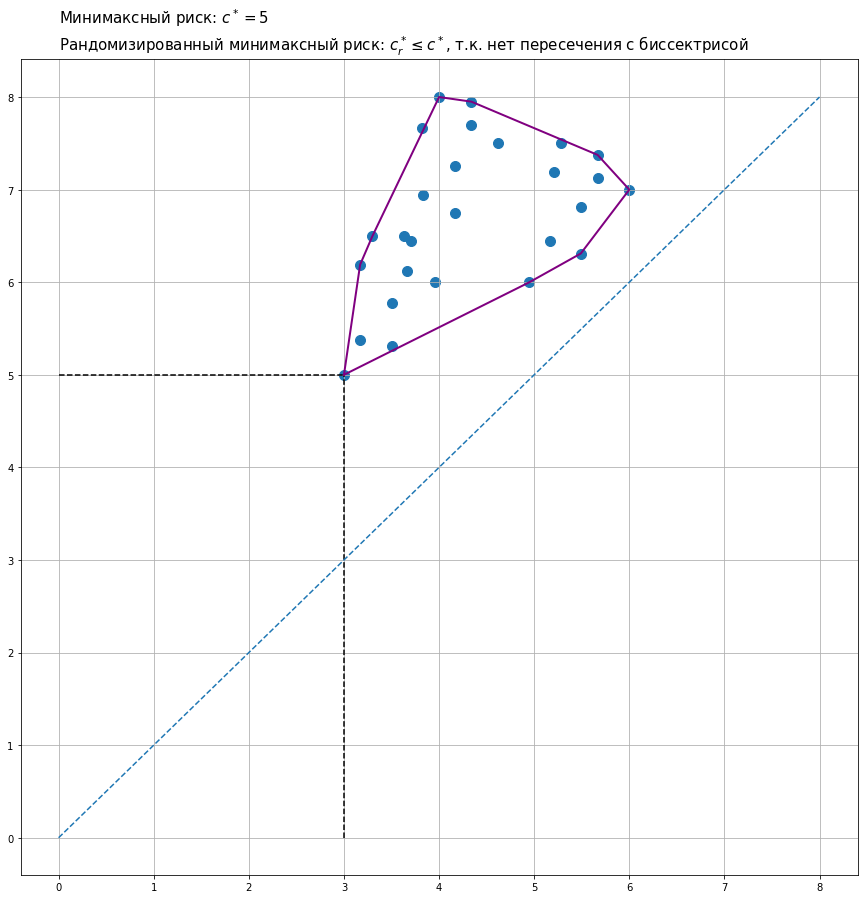

In [32]:
plt.figure(figsize = (15, 15))
plt.scatter(L_1, L_2, s  = 100)
plt.plot(L_1_border, L_2_border, color = 'purple', lw = 2)

plt.vlines(L_1_border[0], 0, L_2_border[0], linestyles='dashed')
plt.hlines(L_2_border[0], 0, L_1_border[0], linestyles='dashed')

plt.grid()

plt.plot(x[:9], x[:9], '--')

plt.text(0, 8.8, s = r'Минимаксный риск: $c^* = 5$', fontsize=15)
plt.text(0, 8.5, s = r'Рандомизированный минимаксный риск: $c_r^* \leq c^*$, т.к. нет пересечения с биcсектрисой',
         fontsize=15)

plt.show()

### Байесовское правило решения

Если мы имеем априорную информацию о состояниях природы: <br>
Пусть информация о том что человек ничего оне делает более 0.5. В целом довольно логичное предположение. 
Так как чаще человек не представлет никакое движение.

|$\theta_i / p$| p($\theta$)   |
|----------------|-------------|
|$\theta_1$      |   0.6    |
|$\theta_2$      |   0.4    |

$$ L(s) = \sum_{i=1}^k {L_i(s) * p(\theta_i)} = \sum_{t=1}^N \sum_{i=1}^k {l(\theta, d_t) * p_s(d_t|\theta_i) * p(\theta_i} $$

По уже известным значениям маргинального риска легко рассчитать и выбрать минимальное.


In [40]:
L_Bayes = df['L_1']*0.6 + df['L_2']*0.4
print('Наименьшее значение', L_Bayes.min(), 'достигается при выборе стратегии s:', L_Bayes.argmin()+1)

Наименьшее значение 3.8 достигается при выборе стратегии s: 3


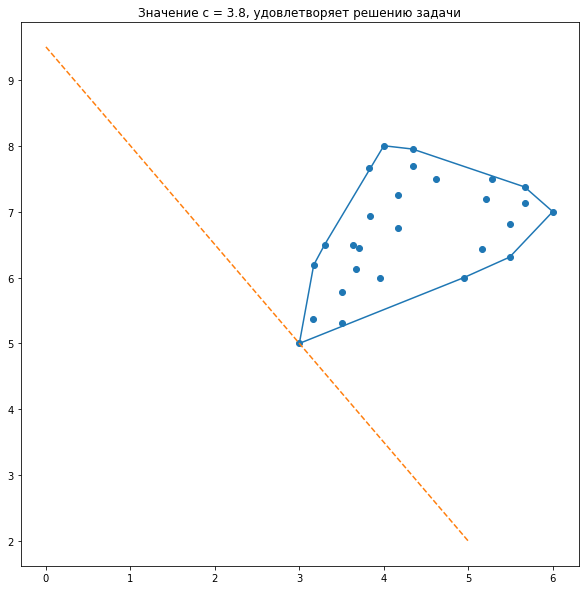

In [50]:
plt.figure(figsize = (10, 10))
plt.title('Значение с = 3.8, удовлетворяет решению задачи')
plt.scatter(L_1, L_2)
plt.plot(L_1_border, L_2_border)

#const из параметр.ур-ний прямой L_1 * r_1 + L_2 * r_2 = c;
c = [2.9, 3.8, 5]
# plt.plot(x[:6], (c[0] - 0.6*x[:6])/0.4, '--')
plt.plot(x[:6], (c[1] - 0.6*x[:6])/0.4, '--')
# plt.plot(x[:6], (c[2] - 0.6*x[:6])/0.4, '--')


# plt.text(2, 12, s =  fontsize=10)



### Байесово действие

И последний из всех вариантов: байесова постановка (с априорной информацией о природе), но без наблюдений.
В таком случае имеем: <br>
$$ L_i(p) = \sum_{i=k}^k {l(\theta_i, d_j) * p(\theta_i)}, L(d_j) \sim min_{1 \leq j \leq N} $$

Матрица потерь:

|$\theta_i / d_j$|$d_1$ |$d_2$ |$d_3$ |$d_4$ |$d_5$ |$d_6$ |$d_7$ |
|----------------|------|------|------|------|------|------|------|
|$\theta_1$      |  3   |  4   |  6   |  8   |  5   |  7   |  5   |
|$\theta_2$      |  5   |  8   |  7   |  4   |  6   |  3   |  5   |

In [51]:
l = [[3, 5], [4,8], [6,7], [8,4], [5,6], [7,3], [5,5]]
# Random значение вероятности p.
p = np.random.sample()
x = np.linspace(0, 1, 50)

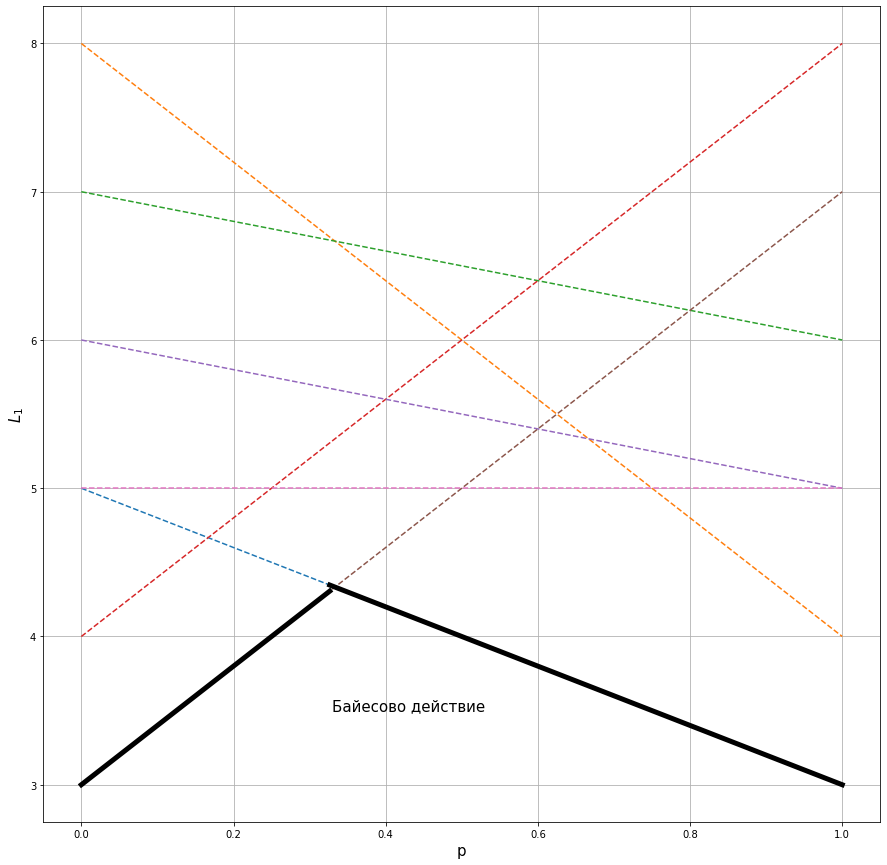

In [52]:
plt.figure(figsize = (15, 15))
for i in range(len(l)):
    plt.plot(x, l[i][0]*x + l[i][1]*(1-x), '--') 

plt.plot(x[:17], l[5][0]*x[:17] + l[5][1]*(1-x[:17]), 'black', lw = 5)
plt.plot(x[16:], l[0][0]*x[16:] + l[0][1]*(1-x[16:]), 'black', lw = 5)

plt.xlabel('p', fontsize=15)
plt.ylabel('$L_1$', fontsize=15)

plt.text(0.33, 3.5, 'Байесово действие', fontsize=15)

plt.grid()
plt.show()